In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import json
# from tensorflow.keras.applications import EfficientNetB0
# import tensorflow as tf
import tarfile
import glob
import os
import time
from tqdm.notebook import tqdm

### Junk code

with open(data_dir + dataset + '.json') as f:
      df.append(json.load(f))

### Notes

##### when searching google use "scientific name" in extra quotes to avoid confusion with latin derivates

## Loading and tarzing dataset

In [2]:
directory = 'C://Users//danie//Documents//DW//Shrooms//shroom_comp//'


data = ["train_val_annotations", "test_information", "fungi_test", "fungi_train_val"]

errors = 'fungi_train_val\\images\\12665_Cortinarius_uliginosus f. uliginosus \\JM2009PIC22142605.JPG'

In [3]:
tarsefiles = False

if tarsefiles is True:
    for idx, dataset in enumerate(data):

        data_dir = directory + dataset

        print(data_dir)

        with tarfile.open(data_dir + '.tgz', 'r:gz') as opened_targz_file:
            try:
                opened_targz_file.extractall(data_dir)
            except FileNotFoundError as error:
                errors.append(error)
                print(error)

### Images

In [4]:
image_directory = directory + data[-1] + '//images//'

shroom_folder_size = []
shroom_folder = None

for dirpath, dirnames, filenames in os.walk(image_directory):
    
    if shroom_folder is None:
        shroom_folder = dirnames
    
    shroom_folder_size.append(len(filenames))
    
# shroom_folder_size.pop(0)

In [5]:
df_images = pd.Series(dict(zip(shroom_folder, shroom_folder_size))).sort_values(ascending=False)
df_images.head()

14435_Gymnopus_dryophilus          342
14069_Fuligo_leviderma             329
14963_Hymenoscyphus_fructigenus    219
14454_Gyromitra_esculenta          197
47767_Schizophyllum_amplum         196
dtype: int64

### Very little chance model will perform well for classes with fewer than 100 images

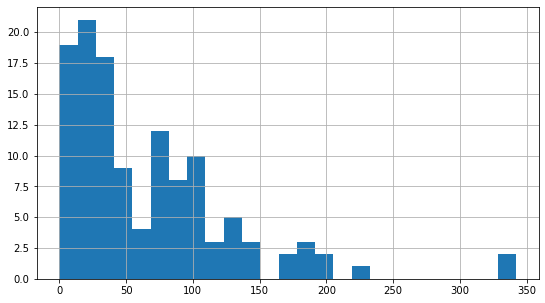

In [6]:
plt.figure(figsize=(9,5))
_ = df_images.hist(bins=25)

### We could attempt for the 27 classes with 100+ images

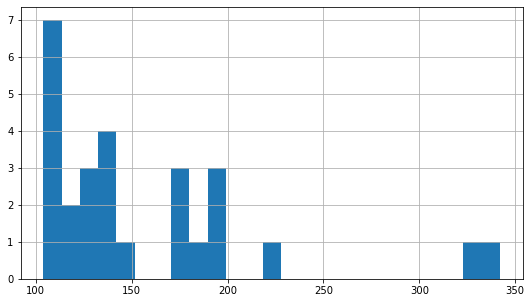

In [7]:
df_images = df_images[df_images > 100]

plt.figure(figsize=(9,5))
_ = df_images.hist(bins=25)

### Perhaps a better way is to use images from search engines for each class and add those images to our dataset

### I will instead scrape a database from www.wildfooduk.com

In [8]:
import requests
from bs4 import BeautifulSoup

In [9]:
# # would be nice to use:
# df_pandas = pd.read_html(url, attrs = {'class': 'wikitable sortable'},  flavor='bs4', thousands ='.')

In [10]:
shroom_DB = "https://www.wildfooduk.com/mushroom-guide/?mushroom_orderby=latin_name&mushroom_order=DESC"
result = requests.get(shroom_DB)

# if successful parse the download into a BeautifulSoup object, which allows easy manipulation 
if result.status_code == 200:
    soup = BeautifulSoup(result.content, "html.parser")
    
table = soup.find('table', class_='mushroom-table')

shrooms_scientific = []

for row in table.tbody.find_all('tr'):
    shroom_image, shroom_common, shroom_scientific, shroom_type, shroom_season_start, shroom_season_end = row.find_all('td')
    
    shroom_common.get_text().strip()
    shroom_scientific.get_text().strip()
    'Edible' in str(shroom_type)        # mushroom type is icons i.e <img alt='sping' height='30'... > could record edible/poisonous, spring, summer, autumn, winter or just use icons 
    shroom_season_start.get_text().strip().replace('Season Start : ', '')
    shroom_season_end.get_text().strip().replace('Season End : ', '')
    
    shrooms_scientific.append(shroom_scientific.get_text().strip())

# cleaning various classes
shrooms_scientific = [shroom.replace('Boletus / ', '') for shroom in shrooms_scientific]
shrooms_scientific = [shroom.replace('Hygrocybe / ', '') for shroom in shrooms_scientific]
shrooms_scientific[5] = 'Scleroderma citrinum'
# shrooms_scientific[60] = "Inocybe geophylla"  -"var. lilacina"       # would be good to remove this from search but causes problems with string
shrooms_scientific[101] = "cantharellus tubaeformis"
shrooms_scientific[115] = "leccinum versipelle"

In [11]:
test = dict(zip(shrooms_scientific, np.arange(len(shrooms_scientific))))
# test

### Now I just need to search Google for each mushroom
#### I use the Image_scrapping tool developed on my github repo

In [12]:
from Image_scraper import ImageScrapper

In [13]:
image_scraper = ImageScrapper(save_path='\\images_test', engine='Google')

image_scraper.search_and_download(search_term='Cat in wig', number_images=2, exact_match=True)

image_scraper.configure_engine('Duckduckgo')

image_scraper.search_and_download(search_term='Cat in wig', number_images=2, exact_match=True)

Extracting 2 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting 2 links from 262 Duckduckgo results:   0%|          | 0/262 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/2 [00:00<?, ?it/s]

#### Use search term with the number of desired images and the directory we wish to store the images in

In [14]:
len(shrooms_scientific)

153

In [20]:
shrooms_scientific[11]

'Russula fellea'

Mushroom no:   0%|          | 0/142 [00:00<?, ?it/s]

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/1/12/Russula_fellea_G3.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2A01F40>
Failed to access image url https://www.discoverlife.org/IM/I_MWS/1293/320/Russula_fellea,I_MWS129385.jpg - HTTPSConnectionPool(host='www.discoverlife.org', port=443): Max retries exceeded with url: /IM/I_MWS/1293/320/Russula_fellea,I_MWS129385.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1125)')))
Could not save https://www.discoverlife.org/IM/I_MWS/1293/320/Russula_fellea,I_MWS129385.jpg - local variable 'image_content' referenced before assignment
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Russula_caerulea.jpg/440px-Russula_caerulea.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2A91D10>
Could not save https://upload.wikimedia.org/wikipedia/commons/0/05/Russ.fell.

Extracting 200 links from 344 Duckduckgo results:   0%|          | 0/344 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_fellea%2CI_MWS129428.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB0ADCC70>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_fellea%2CI_MWS129433.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2ADD4F0>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_fellea%2CI_MWS129427.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB0ADCC70>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_fellea%2CI_MWS129429.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFA8FF90>
Could not save https://external-content.duck

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Russula_emetica_in_Poland.jpg/1200px-Russula_emetica_in_Poland.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2ADD860>
Could not save https://upload.wikimedia.org/wikipedia/commons/c/c1/Russula_emetica_%2829778155110%29.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB0B5C4F0>
Failed to access image url https://www.discoverlife.org/IM/I_LJM/0317/320/Russula_emetica,I_LJM31709.jpg - HTTPSConnectionPool(host='www.discoverlife.org', port=443): Max retries exceeded with url: /IM/I_LJM/0317/320/Russula_emetica,I_LJM31709.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1125)')))
Could not save https://www.discoverlife.org/IM/I_LJM/0317/320/Russula_emetica,I_LJM31709.jpg - local variable 'image_content' referenced before assignment
Could not save https://upload.wikimedia.or

Extracting 200 links from 265 Duckduckgo results:   0%|          | 0/265 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fstatic.panoramio.com%2Fphotos%2Flarge%2F27435555.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2AD1AE0>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2Fmp%2F20p%3Fimg%3DI_MWS123507%26res%3Dmx&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2AAC220>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1235%2F320%2FRussula_emetica%2CI_MWS123503.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2AD1AE0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1235%2F320%2FRussula_emetica%2CI_MWS123509.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2AACDB0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwildmushroomh

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/2010-09-29_Russula_cyanoxantha_cropped.jpg/1200px-2010-09-29_Russula_cyanoxantha_cropped.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB1660720>
Could not save https://upload.wikimedia.org/wikipedia/commons/5/5e/Russula_cyanoxantha_G1.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2ADD860>
Could not save https://upload.wikimedia.org/wikipedia/commons/b/b1/Russulamexicana.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB15F8B80>
Could not save https://upload.wikimedia.org/wikipedia/commons/5/56/Frauen-T%C3%A4ubling_Russula_cyanoxantha.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB15F8B80>
Could not save https://upload.wikimedia.org/wikipedia/commons/f/f2/Russula_cyanoxantha.JPG - cannot identify image file <_io.BytesIO object at 0x000001BEAFA8FF90>


Extracting 200 links from 265 Duckduckgo results:   0%|          | 0/265 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1018%2F320%2FRussula_cyanoxantha%2CI_MWS101875.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFAA4310>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to cl

Saving Images:   0%|          | 0/201 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/b/b6/Russula_claroflava_trio.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB19090>
Could not save https://upload.wikimedia.org/wikipedia/commons/1/1f/Russula_ochroleuca_ch%C3%A2taigne.JPG - cannot identify image file <_io.BytesIO object at 0x000001BEAFB19090>
Could not save https://upload.wikimedia.org/wikipedia/commons/3/31/Gelber_Graustiel-T%C3%A4ubling2.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2ADDA40>
Could not save https://upload.wikimedia.org/wikipedia/commons/9/95/2010-08-11_Russula_claroflava_Grove._ss._Melz%2C_%26_Zv.%2C_J._Schff_98988.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB64B30>


Extracting 200 links from 276 Duckduckgo results:   0%|          | 0/276 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1152%2F320%2FRussula_claroflava%2CI_MWS115253.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2ADD130>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1152%2F320%2FRussula_claroflava%2CI_MWS115278.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB25950>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F0160%2F320%2FRussula_claroflava%2CI_MWS16061.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFAEC090>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F0160%2F320%2FRussula_claroflava%2CI_MWS16030.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB258B0>
Could not save https://externa

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/f/f9/Russula_atropurpurea_BS11.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB64A90>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Zwartpurperen_russula_%28Russula_atropurpurea%29_%28d.j.b.%29_01.jpg/1200px-Zwartpurperen_russula_%28Russula_atropurpurea%29_%28d.j.b.%29_01.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB19770>
Failed to access image url  - No connection adapters were found for ''
Could not save  - local variable 'image_content' referenced before assignment
Could not save https://www.geoffdann.co.uk/wp-content/uploads/2013/03/b2.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB7C900>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Two_views_of_a_mature_Purple_Brittlegill_on_Kaien_Island.png/440px-Two_views_of_a_mature_Purple_Brittlegill_on_Kaien_Island.png - cannot identify image file <_io.BytesIO 
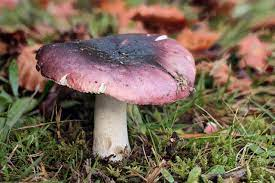
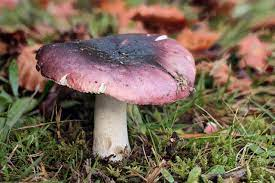
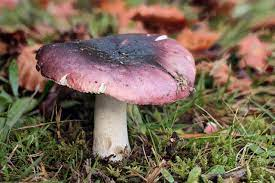

Extracting 200 links from 269 Duckduckgo results:   0%|          | 0/269 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.redd.it%2Fa638ubwzq2951.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB64900>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_atropurpurea%2CI_MWS129488.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB640E0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2FBIG%2F136244.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB25C20>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2F136240.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB25C20>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_atropurpurea%2CI_MWS129491.jpg&f=1&n

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/1/19/Rhodotus_palmatus_41540150.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB19A40>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Rhodotus_palmatus_46170_crop.jpg/220px-Rhodotus_palmatus_46170_crop.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB64EF0>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Rhodotus_palmatus2.jpg/1200px-Rhodotus_palmatus2.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB19770>
Could not save https://upload.wikimedia.org/wikipedia/commons/b/bc/Rhodotus_palmatus_41540148.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2FF7180>
Could not save https://upload.wikimedia.org/wikipedia/commons/b/bf/Rhodotus_palmatus_40169722.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2FF7180>
Could not save https://learn.freshcap.com/wp-content/uploads/2019/07/rhodot

Extracting 200 links from 261 Duckduckgo results:   0%|          | 0/261 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F0301%2F640%2FRhodotus_palmatus%2CI_MWS30198.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFBC09A0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flive.staticflickr.com%2F6071%2F6137346120_81caffc7a7_b.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFAEC090>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to cl

Saving Images: : 0it [00:00, ?it/s]

Failed to save images: 'NoneType' object is not iterable


Extracting 200 links from 261 Duckduckgo results:   0%|          | 0/261 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.luontoportti.com%2Fsuomi%2Fimages%2F27911.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3024090>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2FBIG%2F105814.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEADA75F90>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2F41110.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3024720>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2FBIG%2F195668.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB304D5E0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.luontoportti.com%2Fsuomi%2Fimages%2F27917.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://www.fungipedia.org/media/kunena/attachments/1078/2_2011-12-11.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB304DE50>
Could not save https://onlinelibrary.wiley.com/cms/asset/3d9576b7-96f0-4912-add4-c34c075fe426/ens12460-toc-0001-m.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB3024090>
Could not save https://upload.wikimedia.org/wikipedia/commons/8/88/Rhizopogon_rubescens.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB304DE50>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/2009-09-17_Rhizopogon_obtextus_76099.jpg/220px-2009-09-17_Rhizopogon_obtextus_76099.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB640E0>
Could not save https://upload.wikimedia.org/wikipedia/commons/4/40/P1050633_Rhizopogon_luteolus.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB30244A0>


Extracting 200 links from 66 Duckduckgo results:   0%|          | 0/66 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Retrieving more results


Saving Images: : 0it [00:00, ?it/s]

Failed to save images: 'NoneType' object is not iterable


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://curbstonevalley.com/wp-content/uploads/2010/01/PgelatinosumStem1.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB3104040>
Could not save https://curbstonevalley.com/wp-content/uploads/2010/01/PgelatinosumCol.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEADA75F90>
Could not save https://upload.wikimedia.org/wikipedia/commons/6/6f/Pseudohydnum_gelatinosum_72236.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB30B4810>
Could not save https://upload.wikimedia.org/wikipedia/commons/c/c5/Pseudohydnum_gelatinosum_59890.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB3104590>
Could not save https://upload.wikimedia.org/wikipedia/commons/9/9d/Pseudohydnum_gelatinosum_05.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB30B0950>
Could not save https://www.animalsprints.com/p/491/jelly-tooth-fungus-pseudohydnum-gelatinosum-6124018.jpg.webp - cannot identify image file <_io.BytesIO o

Extracting 200 links from 262 Duckduckgo results:   0%|          | 0/262 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
number_images = 200
start_from = 11

image_scraper = ImageScrapper(save_path='\\images2')

for idx, shroom in enumerate(tqdm(shrooms_scientific[start_from:], desc='Mushroom no: ', position=0, leave=True)):
    
    image_scraper.configure_engine('Google')

    image_scraper.search_and_download(search_term=shroom, number_images=number_images, exact_match=True)

    image_scraper.configure_engine('Duckduckgo')

    image_scraper.search_and_download(search_term=shroom, number_images=number_images, exact_match=True)